In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from motif_utils import kmer2seq
import pickle
from css_utility import *
import math
import re

In [32]:
def motif_df_initProcessing(motif_df="../database/motif/compNg_condw24min5ins3_df.csv"):
    fname=motif_df
    hparam=r'cond(\d+)?|w(\d+)|min(\d+)|ins(\d+)'
    matches=re.findall(hparam,fname)
    numbers=[num for match in matches for num in match if num]
    if not matches[0][0]: # if no number after cond (which is actually cond1 AND cond2)
        cond='_'  # replace it with underscore
        win=numbers[0]
        min_len=numbers[1]
        min_ins=numbers[2]
    else:   
        cond=numbers[0]
        win=numbers[1]
        min_len=numbers[2]
        min_ins=numbers[3]
    
    print("condition: {}, windows: {}, min_length: {}, min_instance: {}".format(cond,win,min_len,min_ins))
    
    # add columns "pro_x" and "length" to the dataframe
    df=pd.read_csv(motif_df, engine='python')
    df_sorted=df.sort_values(by="p")   # sort by p-value, ascending order
    df_sorted["pro_x"]=df_sorted["x"]/df_sorted["n"] # add columns for proportional x over n
    df_sorted["length"]=[len(motif) for motif in df_sorted['motif'].tolist()] # and for length
    
    max_motif_len=max(df_sorted["length"])
    min_motif_len=min(df_sorted["length"])
    print("Total found motif number (p-val<0.05): {}".format(len(df_sorted)))
    print("max motif length: {}, min motif length: {}".format(max_motif_len,min_motif_len))
    
    # list of colored motif
    motif_lst=df_sorted["motif"].tolist()
    colored_motif=[colored_css_str_as_is(motif) for motif in motif_lst]
    
    return df_sorted, colored_motif   

In [34]:
df_sorted, colored_motif = motif_df_initProcessing("../database/motif/compNg_condw24min5ins3_df.csv")

condition: _, windows: 24, min_length: 5, min_instance: 3
Total found motif number (p-val<0.05): 100
max motif length: 15, min motif length: 5
DDDDD
EEDDD
EEEDDD
EEEDD
EEDDDD
EEEEDDD
DDDDDD
EEEEEEED
EEEEEEDDD
DDDDDDD
EEEEEEDD
DEEEE
EEEDDDDDD
DDDDDDDD
DDDDDDE
DEEEEEE
AAAAB
EDDDDDDDDD
AAAAA
DDDDDDDDDEEE
EEDDDDDDDDDDDD
EEEEEE
EDDDDDDDDDDDDD
EEEEE
EDDDDDDDDDDDDDD
EEEEEEE
EEEEEEEE
AAAAAA
EEEEEEEEE
EEEEEEEEEEEE
EEEEEEEEEEEEE
BGGGGGGG
JJJJJJ
BEEEEEE
AAAAAAAA
GGGEE
GGGGGGGGE
EEDDEE
EEDDDDDEE
EEEDDDDDEE
EDDDDDEE
EEGGGG
EEEGG
EEEEGG
EEDDDEEEEE
BGEEE
EEEGGGGGGG
AABBG
JJJJJJJJJ
EEEEEEG
AABEE
EEDDDDEE
EDDDDEE
AAAABG
EEEEEGG
AAABEE
GGGGGG
AAABEEE
EEDEE
AAAAAAABB
EEEDDDE
MMMMLL
GEEEEEE
EEDDDDDDDEE
EEEDDDDDDDEE
EEDEEE
KKLLL
JJJJM
EEEEEGGGEEEE
EEEEEBB
GBBGGG
ACCCCC
EEEEEEEEEDDDDE
GGBBAA
LLMMMMMM
EEEEEEEEEEEEEGG
MJJJJJ
AABBEE
GGBGBGG
AAABBEEE
GGGEEGE
MMJJJJ
LMMMM
HHHHHHH
JJJJJM
AJJJJ
GGBGGG
ABBGGG
ABBGEEEEE
JJJJJA
JJJMMM
EEGEEEE
JJJJJJMM
AAAAGEEE
AAABGEE
GGBGEE
LLLKK
HDDDD
GGEEGE
JJJAAAA


In [35]:
df_sorted.head()

,motif,N,K,n,x,p,pro_x,length
68,DDDDD,999,516,134,133,3.948814e-41,0.992537,5
5,EEDDD,999,516,125,125,3.407183e-40,1.000000,5
16,EEEDDD,999,516,123,123,1.695232e-39,1.000000,6
65,EEEDD,999,516,127,126,1.077829e-38,0.992126,5
17,EEDDDD,999,516,119,119,4.126821e-38,1.000000,6


In [36]:
min(df_sorted["length"])

5

In [41]:
merged_test=pd.read_csv("../database/motif/merged_compNg_condw24min5ins3_df.csv",engine='python')

In [44]:
merged_test.to_list()

AttributeError: 'DataFrame' object has no attribute 'to_list'

In [17]:
compNg_motif_df=pd.read_csv("../database/motif/compNg_motif_df.csv", engine='python')

In [18]:
compNg_motif_df.head()

,motif,N,K,n,x,p
0,KLL,999,516,37,34,1.081072e-07
1,JJJJ,999,516,97,79,1.571091e-10
2,EEGG,999,516,204,129,1.305428e-04
3,EDDD,999,516,127,127,6.809436e-41
4,GGGEEGEEEEEEEEEEEEE,999,516,5,5,3.641948e-02


In [27]:
len(compNg_motif_df)

195

In [24]:
def motif_df_process(motif_df="../database/motif/compNg_motif_df.csv"):
    df=pd.read_csv(motif_df, engine='python')
    df_sorted=df.sort_values(by="p")   # sort by p-value, ascending order
    df_sorted["pro_x"]=df_sorted["x"]/df_sorted["n"] # add columns for proportional x over n
    df_sorted["length"]=[len(motif) for motif in df_sorted['motif'].tolist()] # and for length
    
    max_motif_len=max(df_sorted["length"])
    min_motif_len=min(df_sorted["length"])
    
    print("Total found motif number (p-val<0.05): {}".format(len(df_sorted)))
    print("max motif length: {}, min motif length: {}".format(max_motif_len,min_motif_len))
    fig_h=len(df_sorted)*0.25
    
    # list of colored motif
    motif_lst=df_sorted["motif"].tolist()
    colored_motif=[colored_css_str_as_is(motif) for motif in motif_lst]
    
    # visualization
    fig, axes = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(8,fig_h))
    sns.heatmap(df_sorted[['p']], ax=axes[0], yticklabels=df_sorted['motif'].tolist(),cmap='viridis')
    sns.heatmap(df_sorted[['x']], ax=axes[1], yticklabels=False, cmap="flare")
    sns.heatmap(df_sorted[['pro_x']], ax=axes[2],yticklabels=False, cmap="crest", vmin=0.5) #, cbar=False)
    sns.heatmap(df_sorted[['length']], ax=axes[3],yticklabels=False, cmap="BuPu", vmin=2) #, cbar=False)
    fig.subplots_adjust(wspace=1)
    
    
    return df_sorted, colored_motif   

Total found motif number (p-val<0.05): 195
DDD
DDDD
DDDDD
EDDD
EEED
EEDDD
EDD
EEEDDD
EEDD
EEEED
EEEDD
EEDDDD
DDDDDD
DDE
DDDE
EEDDDDD
EEEEEEDDD
DEEE
DDDDDDD
DDEE
EEEEDDDDD
DDEEE
DDDDE
DEEEE
EDDDDDD
EEEDDDDDD
DDEEEE
DDDDEE
DDDEEEE
DDDDDDDDD
AAAB
EEEEEEEEEDD
DEEEEEE
AAAA
DDDDDDDDDDD
AAAAB
DDDDDDEE
DDDDDDEEE
EDDDDDDDDDDD
EEEE
DDDEEEEEEEE
AAA
EEE
AAAAA
DDDDDDDDDEEE
EEEEEE
EEEEE
GGB
BBB
EEEEEEE
BBG
EEEEEEEE
AAAAAA
GBB
EEEEEEEEE
EEEEEEEEEE
FFF
BGGGG
GGGB
JJJ
AAAAAAA
JJJJ
FFFF
BBGG
AAAABB
JJJJJ
CCC
BBBG
GBG
BGGGGGGG
BAA
JJJJJJ
FFFFF
BBGGG
EEEEEEEEEEEEEE
LLL
KLL
ABBB
GGGGGGEEEE
BEEEEEE
AAAAAAAA
KJJJ
AABG
AACC
GGGEE
GGGGGGGGE
EFF
LLLL
EEEDDEEE
EEEEF
BBBGGG
LLK
EGGGG
JJJJJJJ
EDDDDDEE
LKK
EEEDDDDDEE
AACCC
EEDDDDDEE
EEGGGG
JJJJJJJJ
GGGBG
EEEGG
EFFF
AAACC
GGEE
EGB
GGEEEE
GGE
EEEGGGGGGGG
EEEB
EEEEGB
EDE
EDDDEE
EEEEEEGG
EEEEG
EEEG
EGGG
GEE
GEEE
BGEEEEE
EEDE
AABEE
EEDDDDEE
ABEE
EDDDDE
EGG
AAABG
MLL
EEGG
AAABEE
EDEE
LLLM
EEEEEG
GGGGGG
LKJJ
JLLL
GEEEEE
GEEEEEE
GGEEEEEEEE
EDDDDDDDEE
KKJ
FFFFEE
EEDDDDDDDE


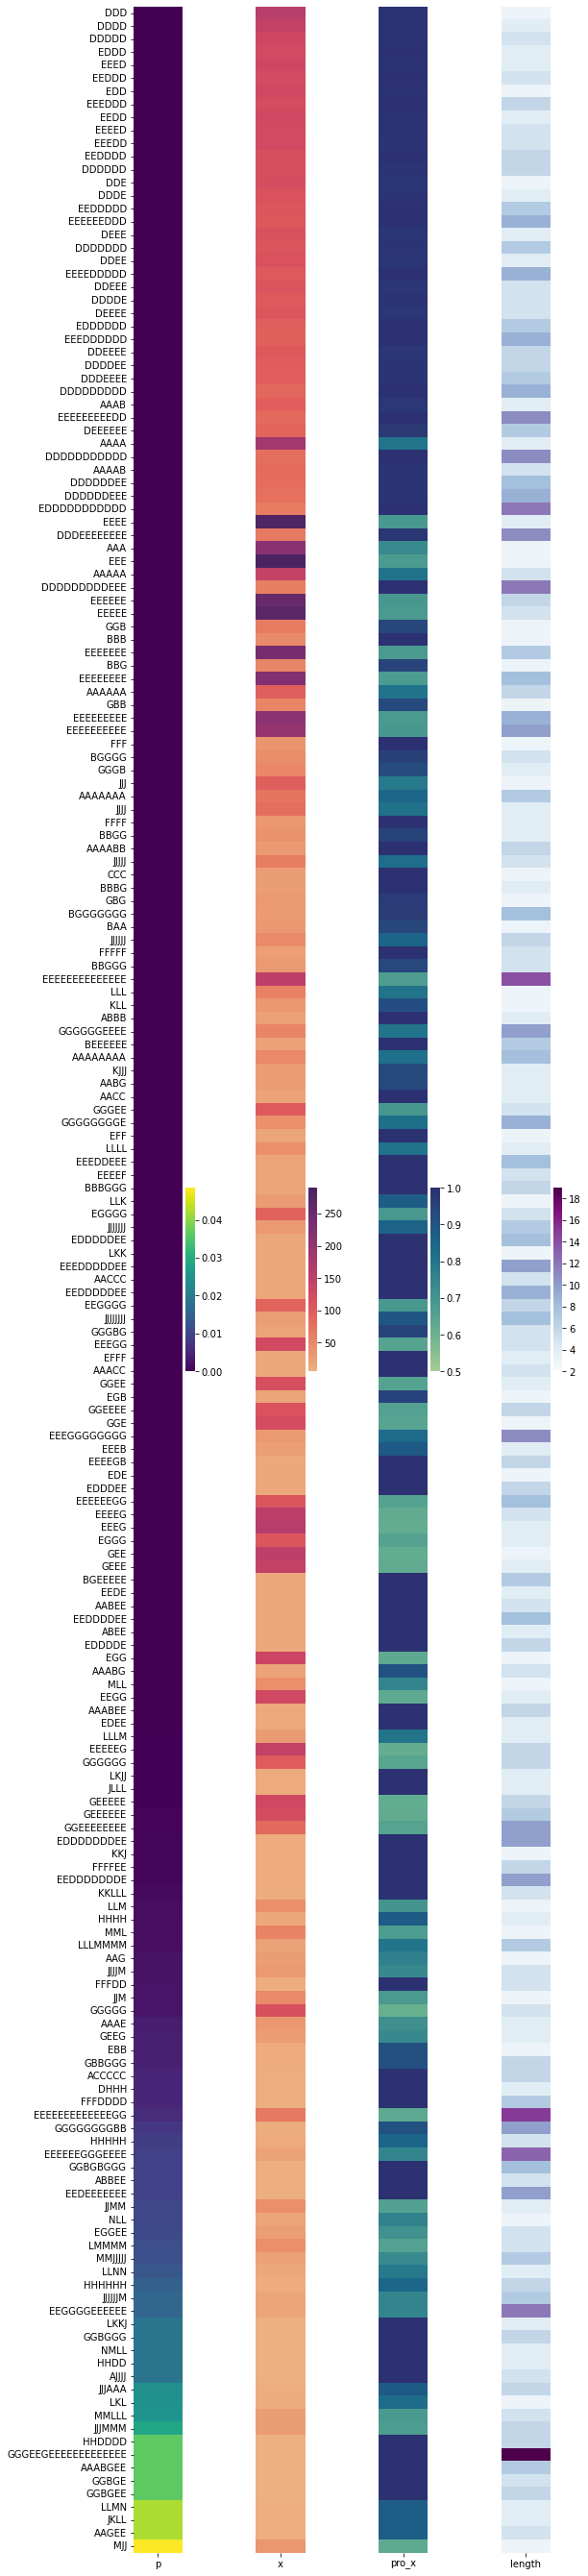

In [25]:
df_sorted, colored_motif=motif_df_process("../database/motif/compNg_motif_df.csv")

In [26]:
df_sorted

,motif,N,K,n,x,p,pro_x,length
39,DDD,999,516,160,159,1.825926e-50,0.993750,3
62,DDDD,999,516,147,146,9.697862e-46,0.993197,4
133,DDDDD,999,516,134,133,3.948814e-41,0.992537,5
3,EDDD,999,516,127,127,6.809436e-41,1.000000,4
188,EEED,999,516,133,132,8.839468e-41,0.992481,4
...,...,...,...,...,...,...,...,...
69,GGBGEE,999,516,5,5,3.641948e-02,1.000000,6
168,LLMN,999,516,8,7,4.238938e-02,0.875000,4
73,JKLL,999,516,8,7,4.238938e-02,0.875000,4
56,AAGEE,999,516,8,7,4.238938e-02,0.875000,5


In [11]:
compNg_dev=pd.read_csv("../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv",sep="\t")

In [12]:
len(compNg_dev)

1000

In [13]:
compNg_dev_dropna=compNg_dev.dropna(subset=["sequence"])

In [14]:
len(compNg_dev_dropna)

999

In [15]:
compNg_dev_dropna.to_csv("../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv", sep="\t", index=False)

In [2]:
comp_train=pd.read_csv("../database/fine_tune/CompG_and_lessCompG/4mer/train.tsv",sep="\t")
len(comp_train)

20000

In [6]:
comp_dev=pd.read_csv("../database/fine_tune/CompG_and_lessCompG/4mer/dev.tsv",sep="\t")

In [10]:
len(comp_dev)

1000

In [8]:
comp_dev_dropna=comp_dev.dropna(subset=["sequence"])

In [9]:
len(comp_dev_dropna)

1000

In [7]:
[kmer2seq(elm) for elm in comp_dev["sequence"]][0]

'DDDDDDDDDDDDDDDFBB'

In [3]:
comp_train_dropna=comp_train.dropna(subset=['sequence'])

In [4]:
len(comp_train_dropna)

19983

In [45]:
comp_train_dropna["sequence_ori"]=[kmer2seq(elm) for elm in comp_train_dropna["sequence"].tolist()]

/Users/schona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
comp_train_dropna.head()

,sequence,label,sequence_ori
0,GGGGE GGGEE GGEEE GEEEE EEEEE EEEEE EEEEE EEEE...,0,GGGGEEEEEEEOGOOOOOOOOOOOOOOOOIIIIIIIEEEEEEEEEE...
1,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,0,EEEEEEEEEEEFFFDEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...
2,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,1,EEEEEEEEEEEEEEEGGGGGGGGEEEEEEEEEEEEEEGBB
3,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,0,EEEEEEEEEEEEEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
4,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,0,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEDDDDDDDDD...


In [2]:
comp_dev=pd.read_csv("../database/fine_tune/CompG_and_lessCompG/5mer/dev.tsv",sep="\t")
comp_dev.head()

,sequence,label
0,AAAAA AAAAA AAAAA AAAAA AAAAE AAAEE AAEEE AEEE...,0
1,DDEEE DEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,1
2,OOOOO OOOOO OOOOO OOOOO OOOOO OOOOG OOOGE OOGE...,0
3,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,0
4,OOOOO OOOOO OOOOO OOOOO,1


In [28]:
len(comp_dev)

1000

In [27]:
comp_dev_dropna=comp_dev.dropna(subset=['sequence'])

In [29]:
len(comp_dev_dropna)

998

In [34]:
comp_dev_dropna["sequence_ori"]=[kmer2seq(elm) for elm in comp_dev_dropna["sequence"].tolist()]

/Users/schona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
comp_dev_dropna.head()

,sequence,label,sequence_ori
0,AAAAA AAAAA AAAAA AAAAA AAAAE AAAEE AAEEE AEEE...,0,AAAAAAAAEEEEEEEEEEEEEEEGGGGEEEEEEEEEEEEEEEEEEE...
1,DDEEE DEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,1,DDEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...
2,OOOOO OOOOO OOOOO OOOOO OOOOO OOOOG OOOGE OOGE...,0,OOOOOOOOOGEEEEGGGEHHEEOOOOOOOOOOOOOOOOOOOOOOOO...
3,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,0,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...
4,OOOOO OOOOO OOOOO OOOOO,1,OOOOOOOO


In [6]:
test_motif_df=pd.read_csv("../database/motif/test_motif_df.csv", engine='python')

In [8]:
test_motif_df.head()

,motif,N,K,n,x,p
0,AAAA,1000,502,292,191,3.991577e-10
1,JJJJJ,1000,502,86,58,5.586020e-04
2,AAA,1000,502,331,213,1.928762e-10
3,MMMM,1000,502,137,84,3.292254e-03
4,MMMMM,1000,502,121,72,1.829080e-02


In [11]:
test_motif_df_sorted=test_motif_df.sort_values(by="p")

In [105]:
test_motif_df_sorted["pro_x"]=test_motif_df_sorted["x"]/test_motif_df_sorted["n"]
test_motif_df_sorted["length"]=[len(motif) for motif in test_motif_df_sorted['motif'].tolist()]

In [122]:
test_motif_df_sorted.head(20)

,motif,N,K,n,x,p,pro_x,length
2,AAA,1000,502,331,213,1.928762e-10,0.643505,3
0,AAAA,1000,502,292,191,3.991577e-10,0.654110,4
6,AAAAA,1000,502,243,154,1.519699e-06,0.633745,5
29,JJJK,1000,502,35,30,9.059658e-06,0.857143,4
7,JJJ,1000,502,141,91,1.569422e-04,0.645390,3
27,JJJJ,1000,502,115,76,1.942198e-04,0.660870,4
23,AAAAAA,1000,502,181,112,3.341956e-04,0.618785,6
33,FFFFFF,1000,502,28,23,4.186622e-04,0.821429,6
16,AAB,1000,502,157,98,5.544478e-04,0.624204,3
1,JJJJJ,1000,502,86,58,5.586020e-04,0.674419,5


In [107]:
test_motif_df_sorted.tail()

,motif,N,K,n,x,p,pro_x,length
15,ABBB,1000,502,41,27,0.028892,0.658537,4
17,JMMML,1000,502,5,5,0.031564,1.000000,5
30,FFFFFFFFF,1000,502,19,14,0.031778,0.736842,9
5,JJJJJJJJ,1000,502,31,21,0.034922,0.677419,8
22,HDDD,1000,502,13,10,0.046491,0.769231,4


In [113]:
min(test_motif_df_sorted["length"])

3

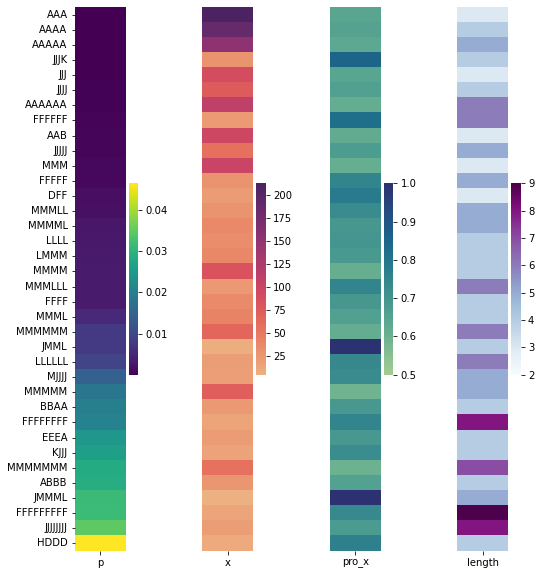

In [117]:
# fig, ax = plt.subplots(figsize=(1,8))
fig, axes = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(8,10))
sns.heatmap(test_motif_df_sorted[['p']], ax=axes[0], yticklabels=test_motif_df_sorted['motif'].tolist(),cmap='viridis')
sns.heatmap(test_motif_df_sorted[['x']], ax=axes[1], yticklabels=False, cmap="flare")
sns.heatmap(test_motif_df_sorted[['pro_x']], ax=axes[2],yticklabels=False, cmap="crest", vmin=0.5) #, cbar=False)
sns.heatmap(test_motif_df_sorted[['length']], ax=axes[3],yticklabels=False, cmap="BuPu", vmin=2) #, cbar=False)
fig.subplots_adjust(wspace=1)

In [118]:
test_motif_df_prox_sorted=test_motif_df_sorted.sort_values(by="pro_x")

In [119]:
test_motif_df_prox_sorted.head()

,motif,N,K,n,x,p,pro_x,length
4,MMMMM,1000,502,121,72,0.018291,0.595041,5
14,MMMMMMM,1000,502,95,57,0.028441,0.600000,7
3,MMMM,1000,502,137,84,0.003292,0.613139,4
8,MMM,1000,502,166,102,0.000973,0.614458,3
10,MMMMMM,1000,502,107,66,0.007774,0.616822,6


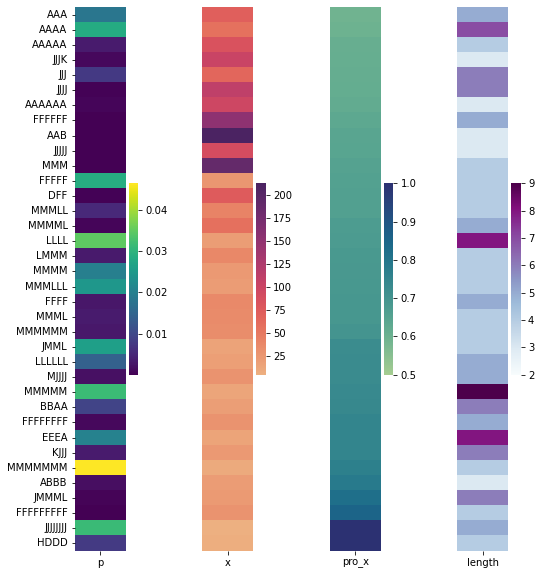

In [120]:
fig, axes = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(8,10))
sns.heatmap(test_motif_df_prox_sorted[['p']], ax=axes[0], yticklabels=test_motif_df_sorted['motif'].tolist(),cmap='viridis')
sns.heatmap(test_motif_df_prox_sorted[['x']], ax=axes[1], yticklabels=False, cmap="flare")
sns.heatmap(test_motif_df_prox_sorted[['pro_x']], ax=axes[2],yticklabels=False, cmap="crest", vmin=0.5) #, cbar=False)
sns.heatmap(test_motif_df_prox_sorted[['length']], ax=axes[3],yticklabels=False, cmap="BuPu", vmin=2) #, cbar=False)
fig.subplots_adjust(wspace=1)

In [13]:
motif_lst=test_motif_df_sorted["motif"].tolist()

In [15]:
colored_motif=[colored_css_str_as_is(motif) for motif in motif_lst]

AAA
AAAA
AAAAA
JJJK
JJJ
JJJJ
AAAAAA
FFFFFF
AAB
JJJJJ
MMM
FFFFF
DFF
MMMLL
MMMML
LLLL
LMMM
MMMM
MMMLLL
FFFF
MMML
MMMMMM
JMML
LLLLLL
MJJJJ
MMMMM
BBAA
FFFFFFFF
EEEA
KJJJ
MMMMMMM
ABBB
JMMML
FFFFFFFFF
JJJJJJJJ
HDDD


Followings are somehow solved, but remained to be aware

### Problem
* `train.tsv` and `dev.tsv` do not have fixed length, which results in skewed profile of attention score matrix.
* If there is no letter, no score

#### But first I didn't realize it and just wonder why simple pattern like `AAAA` is included in the dataset categorized as "complex" gene
* So I just checked the data

In [27]:
comp_path="../database/temp_files/complexity/thres_mean/comp"
comp=pickle.load(open(comp_path, "rb"))
less_comp_path="../database/temp_files/complexity/thres_mean/less_comp"
less_comp=pickle.load(open(less_comp_path, "rb"))

In [6]:
comp

['MMMMMMMMMMMMMNNNNNNNNNNNNLMMMMMMMMMML',
 'MNNEEEEEEEEEEEEEEEEEEEEEEEEEDDDDDDDEEEEEEEEEEEEEEEEEEEEDDDDDDDDEEEEGGGEAAJJ',
 'JJJJJJMMMNNNNNNNNNNNNN',
 'JJJ',
 'JJJ',
 'MMMJJJMNNNNNNNNMMMNNNNNNNNNNN',
 'MMMJJJMNNNNNNNNMMMNNNNNNNNNNN',
 'AAA',
 'MMMMMMMMMMMNNNNNNNMLLLLL',
 'NNMMMM',
 'NNNNNNNNNMNNN',
 'MMMMMMMMMMMNNNNNNNNNNNNOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGGGGGGGGGBGGGGGGKKJJJ',
 'AAAAAAEEEEEEE',
 'DEEEEEEEEEEEEEEEEEGGGGGGEEEEEEEEEGGEEEEEEEEEEEEEEEEEEEEEEEEGGGE',
 'DEEEEEEEEEEEEEEEEEGGGGGGEEEEEEEEEGGEEEEEEEEEEEEEEEEEEEEEEEEGGGE',
 'DEEEEEEEEEEEEEEEEEGGGGGGEEEEEEEEEGGEEEEEEEEEEEEEEEEEEEEEEEEGGGE',
 'DEEEEEEEEEEEEEEEEEGGGGGGEEEEEEEEEGGEEEEEEEEEEEEEEEEEEEEEEEEGGGE',
 'DEEEEEEEEEEEEEEEEEGGGGGGEEEEEEEEEGGEEEEEEEEEEEEEEEEEEEEEEEEGGGE',
 'AAAA',
 'NLMMMLJJJJJMMMMNNNNNNNNNNAAAABGGGGGGGGGGGGGGGGGG',
 'NLMMMLJJJJJMMMMNNNNNNNNNN',
 'NLMMMLJJJJJMMMMNNNNNNNNNNAAAA',
 'NLMMMLJJJJJMMMMNNNNNNNNNNAAAAB',
 'NLMMMLJJJJJMMMMNNNNNNNNNNAAAA',
 'OOO',
 'OOO',
 'OOO',
 'EEEEEEEEEEDDDEEEDDDDDDDDDDDDDDDDDDDDDDDDD

#### Why such simple pattern like 'AAA' is in `comp`?

In [7]:
less_comp

['OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'KMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMKKLLLLMMMMMMMMMMMMMMLLLLLKJJJJJJJMMMMMMMMMMMMMM',
 'AAAAAAAGGGGGGGGGGGG

In [8]:
css_gene_unit_lst_all=pickle.load(open("../database/temp_files/css_gene_unit_lst_all", "rb"))

In [15]:
type(css_gene_unit_lst_all[0])

list

In [21]:
css_gene_unit_lst_all[0][:20]

['OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO',
 'A',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'MMMMMMMMMMMMMNNNNNNNNNNNNLMMMMMMMMMML',
 'KMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMKKLLLLMMMMMMMMMMMMMMLLL

In [19]:
[len(elm) for elm in css_gene_unit_lst_all[0]]

[67,
 1,
 157,
 157,
 157,
 157,
 156,
 37,
 93,
 75,
 22,
 3,
 3,
 29,
 29,
 3,
 162,
 162,
 168,
 24,
 108,
 75,
 75,
 6,
 13,
 92,
 92,
 92,
 92,
 57,
 57,
 76,
 13,
 63,
 63,
 63,
 63,
 63,
 4,
 61,
 48,
 25,
 29,
 30,
 29,
 3,
 3,
 3,
 64,
 31,
 5,
 22,
 15,
 15,
 15,
 4,
 21,
 21,
 21,
 7,
 7,
 102,
 70,
 80,
 80,
 78,
 24,
 157,
 8,
 61,
 61,
 61,
 61,
 61,
 58,
 2,
 423,
 423,
 423,
 423,
 423,
 423,
 154,
 154,
 106,
 106,
 106,
 106,
 106,
 106,
 105,
 92,
 131,
 131,
 142,
 525,
 525,
 525,
 7,
 407,
 17,
 622,
 506,
 504,
 351,
 113,
 44,
 44,
 44,
 44,
 19,
 115,
 19,
 19,
 7,
 399,
 348,
 178,
 80,
 57,
 34,
 34,
 52,
 8,
 8,
 84,
 6,
 63,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 208,
 598,
 40,
 17,
 1744,
 1744,
 99,
 612,
 19,
 93,
 408,
 408,
 408,
 408,
 408,
 408,
 217,
 217,
 217,
 217,
 217,
 217,
 180,
 52,
 52,
 52,
 52,
 52,
 96,
 11,
 11,
 71,
 217,
 114,
 114,
 114,
 48,
 66,
 46,
 510,
 510,
 644,
 644,
 644,
 644,
 461,
 292,
 292,
 251,
 193,
 192,
 390,
 66,
 4,


In [16]:
df=complexity_overview_mat(css_gene_unit_lst_all[0])

In [20]:
df.head(20)

,length,uniq,switch,uniq_pro,switch_pro
0,67,1,1,0.014925,0.014925
2,157,5,8,0.031847,0.050955
3,157,5,8,0.031847,0.050955
4,157,5,8,0.031847,0.050955
5,157,5,8,0.031847,0.050955
6,156,4,7,0.025641,0.044872
7,37,3,5,0.081081,0.135135
8,93,4,9,0.043011,0.096774
9,75,7,11,0.093333,0.146667
10,22,3,3,0.136364,0.136364


In [22]:
df_test=df[df["length"]>=10]

In [23]:
df_test.head(20)

,length,uniq,switch,uniq_pro,switch_pro
0,67,1,1,0.014925,0.014925
2,157,5,8,0.031847,0.050955
3,157,5,8,0.031847,0.050955
4,157,5,8,0.031847,0.050955
5,157,5,8,0.031847,0.050955
6,156,4,7,0.025641,0.044872
7,37,3,5,0.081081,0.135135
8,93,4,9,0.043011,0.096774
9,75,7,11,0.093333,0.146667
10,22,3,3,0.136364,0.136364


In [24]:
len(df_test)

4063

In [25]:
len(df)

4380

#### Well, `AAAA` was included becuase the `switch_pro` is higher than their mean value, which makes sense.. I defined the criteria as "no. of switching/total length" and the mean value is only ~0.1 or something.

### The real problem is that fine tuning was conducted wrong with the previous dataset. I need fixed length of them. 
But there are some problems:
* To make them in fixed length, I need to concatenate the pattern, if it is too short.

So there are two ways:

* One, remove the short pattern and we just deal with long patterns
* Two, concatenate it and see what happends

... Or another option can be reduce the attention matrix size?

In [28]:
# First, I need to check whether dataset has enough number that we can remove the shorter patterns:
len(comp)

13484

(array([1.2734e+04, 5.3100e+02, 1.2600e+02, 3.5000e+01, 1.6000e+01,
        2.2000e+01, 1.5000e+01, 0.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([   2. ,  159.5,  317. ,  474.5,  632. ,  789.5,  947. , 1104.5,
        1262. , 1419.5, 1577. ]),
 <BarContainer object of 10 artists>)

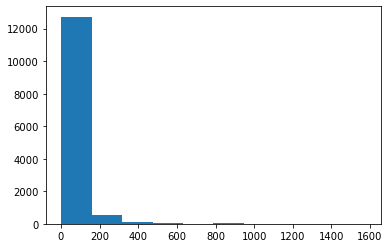

In [31]:
# Well, for DNABERT, sample data for train.tsv has 32367 (dev.tsv has 1001)
# Anywhy, the length?
plt.hist([len(elm) for elm in comp])

(array([3770., 2268., 1697., 1254.,  755.,  680.,  506.,  354.,  319.,
         263.]),
 array([  2. ,  11.8,  21.6,  31.4,  41.2,  51. ,  60.8,  70.6,  80.4,
         90.2, 100. ]),
 <BarContainer object of 10 artists>)

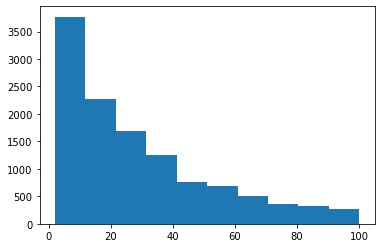

In [32]:
plt.hist([len(elm) for elm in comp if len(elm)<=100])

#### So the majority of the complex gene pattern is shorter than almost 50. And if this is because I removed the non-complex pattern, than maybe I need to re-do the fine tuning with all gene, before dividing them into complex and non-complex

In [36]:
all_css_lst=flatLst(css_gene_unit_lst_all)  # all gene list
len(all_css_lst)

43428

(array([4.1068e+04, 1.6180e+03, 4.5800e+02, 1.4700e+02, 7.7000e+01,
        2.5000e+01, 1.6000e+01, 6.0000e+00, 7.0000e+00, 6.0000e+00]),
 array([1.00000e+00, 1.14970e+03, 2.29840e+03, 3.44710e+03, 4.59580e+03,
        5.74450e+03, 6.89320e+03, 8.04190e+03, 9.19060e+03, 1.03393e+04,
        1.14880e+04]),
 <BarContainer object of 10 artists>)

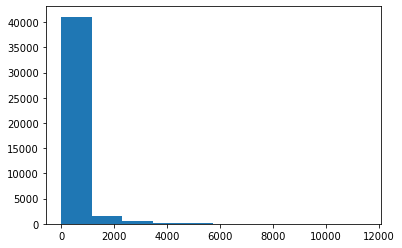

In [34]:
plt.hist([len(elm) for elm in all_css_lst])

(array([19793.,  7874.,  4265.,  2612.,  1762.,  1435.,   987.,   755.,
          587.,   465.]),
 array([   1. ,  100.9,  200.8,  300.7,  400.6,  500.5,  600.4,  700.3,
         800.2,  900.1, 1000. ]),
 <BarContainer object of 10 artists>)

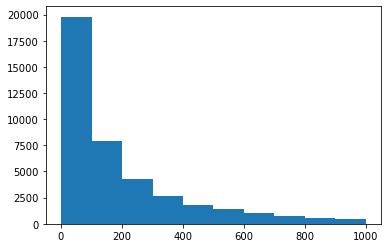

In [35]:
plt.hist([len(elm) for elm in all_css_lst if len(elm)<=1000])

#### Then what about the fixed length of DNABERT fine-tuning?

In [38]:
dna_train=pd.read_csv("../database/dnabert/examples/sample_data/ft/6/train.tsv", sep="\t")
dna_train.head()

,sequence,label
0,CACAGC ACAGCC CAGCCA AGCCAG GCCAGC CCAGCC CAGC...,0
1,CTAATC TAATCT AATCTA ATCTAG TCTAGT CTAGTA TAGT...,1
2,GGAAGA GAAGAG AAGAGG AGAGGG GAGGGA AGGGAA GGGA...,1
3,CGAAAG GAAAGC AAAGCA AAGCAA AGCAAT GCAATC CAAT...,1
4,TGACTC GACTCC ACTCCC CTCCCA TCCCAA CCCAAA CCAA...,1


In [42]:
dna_dev=pd.read_csv("../database/dnabert/examples/sample_data/ft/6/dev.tsv", sep="\t")

In [39]:
dna_train_seq=[kmer2seq(elm) for elm in dna_train["sequence"].tolist()]

In [40]:
len(dna_train_seq)

32366

In [43]:
np.sum(dna_dev["label"])

500

(array([    0.,     0.,     0.,     0.,     0., 32366.,     0.,     0.,
            0.,     0.]),
 array([100.5, 100.6, 100.7, 100.8, 100.9, 101. , 101.1, 101.2, 101.3,
        101.4, 101.5]),
 <BarContainer object of 10 artists>)

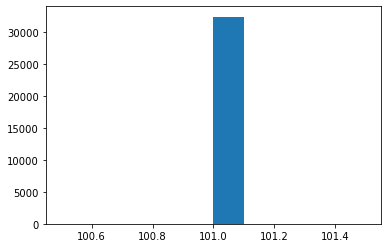

In [48]:
plt.hist([len(elm) for elm in dna_train_seq])

In [49]:
len(dna_train_seq[0])

101

#### Means that the "fixed" length for DNABERT fine-tuning dataset element is 101

Now then make it 101 for the gene data

In [50]:
comp_train=pd.read_csv("../database/fine_tune/CompG_and_lessCompG/5mer/train.tsv",sep="\t")
comp_train.head()

,sequence,label
0,GGGGE GGGEE GGEEE GEEEE EEEEE EEEEE EEEEE EEEE...,0
1,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,0
2,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,1
3,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,0
4,EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEEE EEEE...,0


In [51]:
comp_train_seq=[kmer2seq(elm) for elm in comp_train["sequence"].tolist()]

AttributeError: 'float' object has no attribute 'split'

In [59]:
comp_train_type=[type(elm) for elm in comp_train["sequence"].tolist() if type(elm)=='float']

In [60]:
comp_train_type

[]